In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as pp
from IPython import display
from ipywidgets import interact, widgets


%matplotlib inline


In [2]:
data = pd.read_csv('../../Data/NO2_hors_Paris.csv')

In [4]:
data

,departement,X,Y,Année,Valeur
0,75,2.290811,48.842157,2012,41.316912
1,75,2.405807,48.875666,2012,63.683878
2,75,2.332706,48.866140,2012,41.507336
3,75,2.347347,48.866889,2012,45.197342
4,75,2.364801,48.856970,2012,40.109546
...,...,...,...,...,...
75175,92,2.169196,48.843135,2017,22.381235
75176,92,2.168477,48.877698,2017,23.277292
75177,92,2.266671,48.806425,2017,27.989549
75178,92,2.262114,48.887357,2017,33.622643


In [5]:
data['Région']='NE'
 

In [6]:
data.loc[ (data.X<=data.X.mean()) & (data.Y>=data.Y.mean()) , 'Région']= 'NO'

In [7]:
data.loc[ (data.X>data.X.mean()) & (data.Y<data.Y.mean())  , 'Région']= 'SE'

In [8]:
data.loc[ (data.X<=data.X.mean()) & (data.Y<data.Y.mean())  , 'Région']= 'SO'

In [92]:
data_cond = data.loc[ (data.departement!=75) & (data.departement!=93) & (data.departement!=92) & (data.departement!=94) & (data.Année == 2012)].sample(40)[['X','Y']]

In [93]:
data_cond 

,X,Y
4792,2.265524,48.583881
4074,2.079730,48.535050
1866,2.643080,48.542555
3633,1.692530,49.014221
2424,2.548618,48.627349
3570,2.050024,48.763934
4315,2.273900,48.731239
4260,2.275590,48.639284
4327,2.351316,48.688171
4723,2.300796,48.518267


In [94]:
data_mini = data.loc[(data.X.isin(data_cond.X)) & (data.Y.isin(data_cond.Y))].copy()

In [95]:
data_mini

,departement,X,Y,Année,Valeur,Région
1334,77,2.529521,48.278498,2012,7.913346,SE
1531,77,2.790226,48.897606,2012,21.242239,NE
1866,77,2.643080,48.542555,2012,22.338126,SE
1898,77,3.127209,48.948486,2012,15.191698,NE
1903,77,2.861889,48.883326,2012,20.830003,NE
...,...,...,...,...,...,...
74554,95,2.091516,49.017563,2017,23.335245,NO
74890,91,2.173384,48.755263,2017,20.476328,SO
74950,91,2.432327,48.689358,2017,25.160684,SE
75027,91,2.429110,48.627909,2017,26.394246,SE


In [96]:
data_mini['Valeur'] = data_mini['Valeur'] - data_mini['Valeur'].min()
data_mini['Valeur'] = data_mini['Valeur'] / data_mini['Valeur'].max()
 

In [97]:
data_mini

,departement,X,Y,Année,Valeur,Région
1334,77,2.529521,48.278498,2012,0.090049,SE
1531,77,2.790226,48.897606,2012,0.550276,NE
1866,77,2.643080,48.542555,2012,0.588116,SE
1898,77,3.127209,48.948486,2012,0.341360,NE
1903,77,2.861889,48.883326,2012,0.536043,NE
...,...,...,...,...,...,...
74554,95,2.091516,49.017563,2017,0.622545,NO
74890,91,2.173384,48.755263,2017,0.523831,SO
74950,91,2.432327,48.689358,2017,0.685575,SE
75027,91,2.429110,48.627909,2017,0.728168,SE


In [98]:
def plotyear(aaaa):
    data_to_plot  = data_mini[data_mini.Année == aaaa ]
    area = 2000 * data_to_plot.Valeur
    colors = data_to_plot.Région.map({'NO': 'r', 'NE': 'b', 'SE': 'g', 'SO': 'k'}) 
    
    data_to_plot.plot.scatter('X','Y',
                      s=area,c=colors,
                      linewidths=1,edgecolors='k',
                      figsize=(12,9))
    
    pp.axvline(data.X.mean(),c='y', linewidth=2, linestyle='-')
    pp.axhline(data.Y.mean(),c='y', linewidth=2, linestyle='-')
    pp.xlabel('X')
    pp.ylabel('Y')

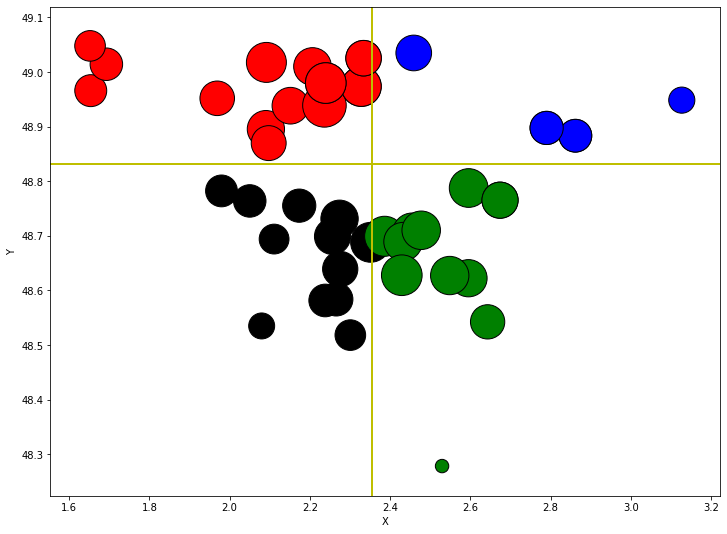

In [102]:
plotyear(2012)

In [100]:
interact(plotyear,aaaa=widgets.IntSlider(min=2012,max=2017,step=1,value=2012))

interactive(children=(IntSlider(value=2012, description='aaaa', max=2017, min=2012), Output()), _dom_classes=(…

<function __main__.plotyear(aaaa)>